In [1]:
import warnings
import os
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from keras.utils import to_categorical

from tensorflow.keras import optimizers
import seaborn as sns
import tensorflow 
import h5py


warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.7f}'.format
pd.options.display.max_rows = None

In [2]:
h5f = h5py.File(r'C:\Personal\AI\NNProject\Autonomous_Vehicles_SVHN_single_grey1.h5')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [3]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [4]:
X_train[:1]   

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [5]:
y_train[:1]

array([2], dtype=uint8)

In [6]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [7]:
y_test[:1]

array([1], dtype=uint8)

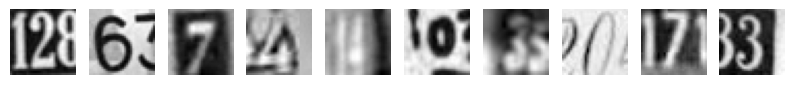

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [9]:
X_train.shape

(42000, 32, 32)

In [10]:
y_train.shape

(42000,)

Need to reshape the X_train and X_test so that the same can be fed for model building.
Currently we have a 3D tensor and we need to feed a 2D tensor into the model.

We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255

In [11]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


Encoding the target variables. We need to one hot encode the labels for the
model to understand the labels better. We will be using categorical cross entropy as our loss function and for this 
purpose we need our labels to be in one hot encoded format.

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


In [13]:
def nn_model():
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [14]:
model = nn_model()

In [15]:
sgd = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

Fitting the model on the training dataset along with it's equivalent one hot encoded labels

In [16]:
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 4s - loss: 2.3050 - accuracy: 0.1070 - val_loss: 2.2977 - val_accuracy: 0.1100 - 4s/epoch - 31ms/step
Epoch 2/100
140/140 - 2s - loss: 2.1644 - accuracy: 0.1945 - val_loss: 1.9619 - val_accuracy: 0.2814 - 2s/epoch - 13ms/step
Epoch 3/100
140/140 - 2s - loss: 1.8196 - accuracy: 0.3507 - val_loss: 1.5821 - val_accuracy: 0.4615 - 2s/epoch - 12ms/step
Epoch 4/100
140/140 - 2s - loss: 1.5040 - accuracy: 0.4789 - val_loss: 1.4005 - val_accuracy: 0.5274 - 2s/epoch - 12ms/step
Epoch 5/100
140/140 - 2s - loss: 1.3816 - accuracy: 0.5329 - val_loss: 1.3663 - val_accuracy: 0.5407 - 2s/epoch - 12ms/step
Epoch 6/100
140/140 - 2s - loss: 1.3194 - accuracy: 0.5596 - val_loss: 1.2859 - val_accuracy: 0.5726 - 2s/epoch - 15ms/step
Epoch 7/100
140/140 - 2s - loss: 1.2509 - accuracy: 0.5903 - val_loss: 1.2520 - val_accuracy: 0.5906 - 2s/epoch - 15ms/step
Epoch 8/100
140/140 - 2s - loss: 1.2048 - accuracy: 0.6096 - val_loss: 1.1964 - val_accuracy: 0.6089 - 2s/epoch - 15ms/step
Epoch 9/

Epoch 67/100
140/140 - 2s - loss: 0.5066 - accuracy: 0.8398 - val_loss: 0.6604 - val_accuracy: 0.8086 - 2s/epoch - 15ms/step
Epoch 68/100
140/140 - 2s - loss: 0.4883 - accuracy: 0.8483 - val_loss: 0.6899 - val_accuracy: 0.8007 - 2s/epoch - 12ms/step
Epoch 69/100
140/140 - 2s - loss: 0.4922 - accuracy: 0.8464 - val_loss: 0.7028 - val_accuracy: 0.7978 - 2s/epoch - 13ms/step
Epoch 70/100
140/140 - 2s - loss: 0.4973 - accuracy: 0.8432 - val_loss: 0.6797 - val_accuracy: 0.8056 - 2s/epoch - 13ms/step
Epoch 71/100
140/140 - 2s - loss: 0.4824 - accuracy: 0.8501 - val_loss: 0.6682 - val_accuracy: 0.8081 - 2s/epoch - 13ms/step
Epoch 72/100
140/140 - 2s - loss: 0.4897 - accuracy: 0.8468 - val_loss: 0.6876 - val_accuracy: 0.8019 - 2s/epoch - 15ms/step
Epoch 73/100
140/140 - 2s - loss: 0.4690 - accuracy: 0.8530 - val_loss: 0.6659 - val_accuracy: 0.8086 - 2s/epoch - 15ms/step
Epoch 74/100
140/140 - 2s - loss: 0.4704 - accuracy: 0.8522 - val_loss: 0.6957 - val_accuracy: 0.8017 - 2s/epoch - 15ms/step


In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6620492935180664
Accuracy: 0.8199999928474426


Text(0.5, 1.0, 'Training and validation loss')

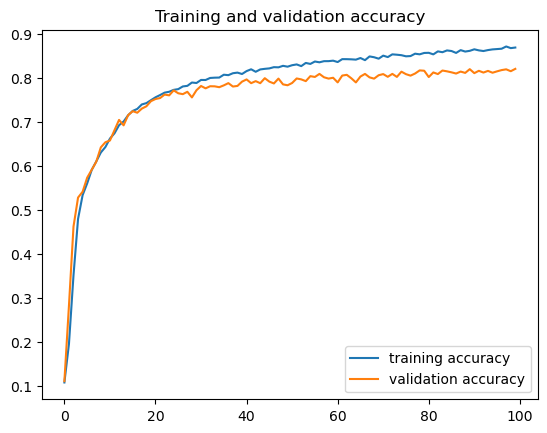

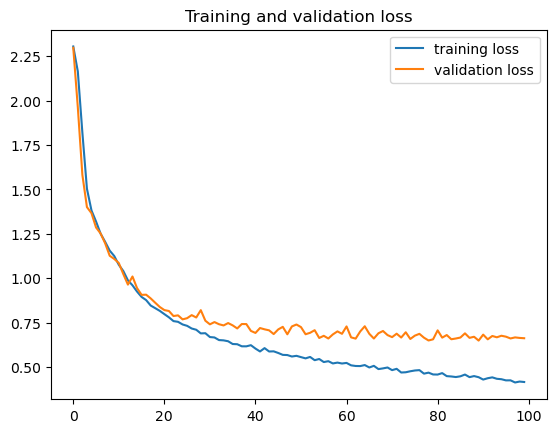

In [18]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) 

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 80.74 %.

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.